In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [136]:
import pandas as pd
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/flu.csv'
df = pd.read_csv(url)
df

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.00,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.00,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.00,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.00,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.00,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,COVID19,NaN,1.40,NaN,NaN,9.2,NaN,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1478,COVID19,NaN,0.83,NaN,NaN,14.8,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1479,COVID19,NaN,3.00,NaN,NaN,15.0,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1480,COVID19,NaN,4.00,NaN,NaN,6.6,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Sekilas dilihat banyak nilai yang missing, namun banyak data yang berisi Yes dan No saja, ada kemungkinan data yang kosong berarti No. Nanti akan diproses.

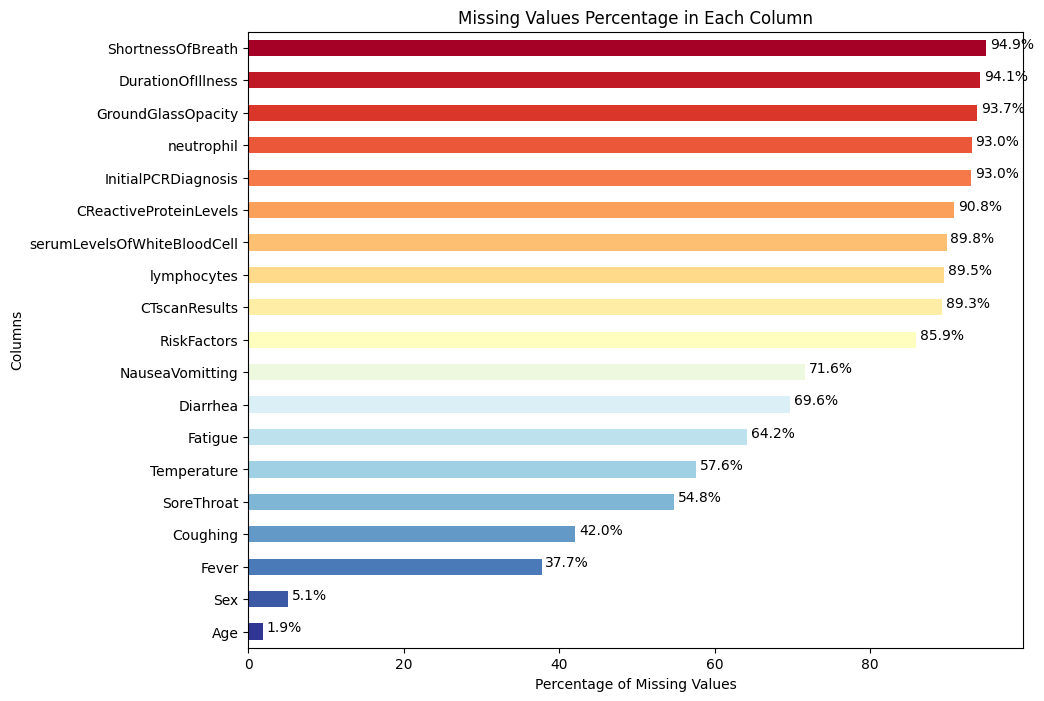

In [137]:
# Plot missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages = missing_percentages[missing_percentages > 0]
missing_percentages = missing_percentages.sort_values(ascending=True)

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(missing_percentages)))

plt.figure(figsize=(10, 8))
missing_percentages.plot(kind='barh', color=colors)
plt.title('Missing Values Percentage in Each Column')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')

for i, v in enumerate(missing_percentages):
    plt.text(v + 0.5, i, f'{v:.1f}%')


#### Fitur yang banyak missing (85%) akan di drop, sisanya akan diproses datanya sesuai tipe data

In [138]:
# # Drop features with missing values above 85%
# missing_percentages = (df.isnull().sum() / len(df)) * 100
# features_to_drop = missing_percentages[missing_percentages > 85].index.tolist()

# print(f"Features to drop (>85% missing): {features_to_drop}")
# df_cleaned = df.drop(columns=features_to_drop)

# print(f"Original dataframe shape: {df.shape}")
# print(f"Cleaned dataframe shape: {df_cleaned.shape}")

# df = df_cleaned


#### *Setelah mencoba tidak drop fitur, ternyata model lebih bagus ketika tidak didrop

In [139]:
# Drop rows with missing values in 'Age' or 'Sex'
df = df.dropna(subset=['Age', 'Sex'])
print(f"Dataframe shape after dropping rows with missing Age or Sex: {df.shape}")


Dataframe shape after dropping rows with missing Age or Sex: (1392, 20)


#### Yang nilai missingnya kecil kita langsung drop saja rownya.

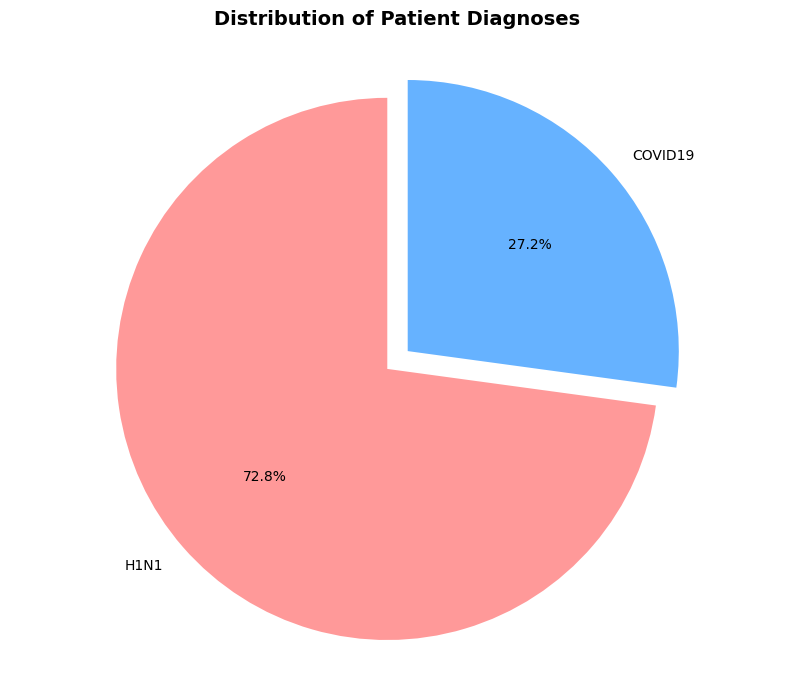

In [140]:
# Plot Diagnosis
diagnosis_counts = df['Diagnosis'].value_counts()

plt.figure(figsize=(10, 8))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
plt.pie(diagnosis_counts, 
        labels=diagnosis_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        shadow=False,
        startangle=90,
        explode=[0.05] * len(diagnosis_counts))

plt.title('Distribution of Patient Diagnoses', 
         pad=20, 
         fontsize=14, 
         fontweight='bold')

plt.axis('equal')
plt.show()



#### Fitur Diagnosis akan dijadikan target klasifikasi. Ada dua kelas, yaitu H1N1 dan COVID19. Perbandingan kelas tidak seimbang, akan dilihat apakah akan berpengaruh ke performa model atau tidak.

Diagnosis
Diagnosis
H1N1       1014
COVID19     378
Name: count, dtype: int64

InitialPCRDiagnosis
InitialPCRDiagnosis
Yes    97
No      4
Name: count, dtype: int64

Sex
Sex
M    743
F    649
Name: count, dtype: int64

CTscanResults
CTscanResults
Yes    138
No      15
Name: count, dtype: int64

GroundGlassOpacity
GroundGlassOpacity
Yes    84
No      3
Name: count, dtype: int64

Diarrhea
Diarrhea
No     340
Yes    109
Name: count, dtype: int64

Fever
Fever
Yes    771
No     144
Name: count, dtype: int64

Coughing
Coughing
Yes    739
No     113
Name: count, dtype: int64

ShortnessOfBreath
ShortnessOfBreath
Yes    45
No     29
Name: count, dtype: int64



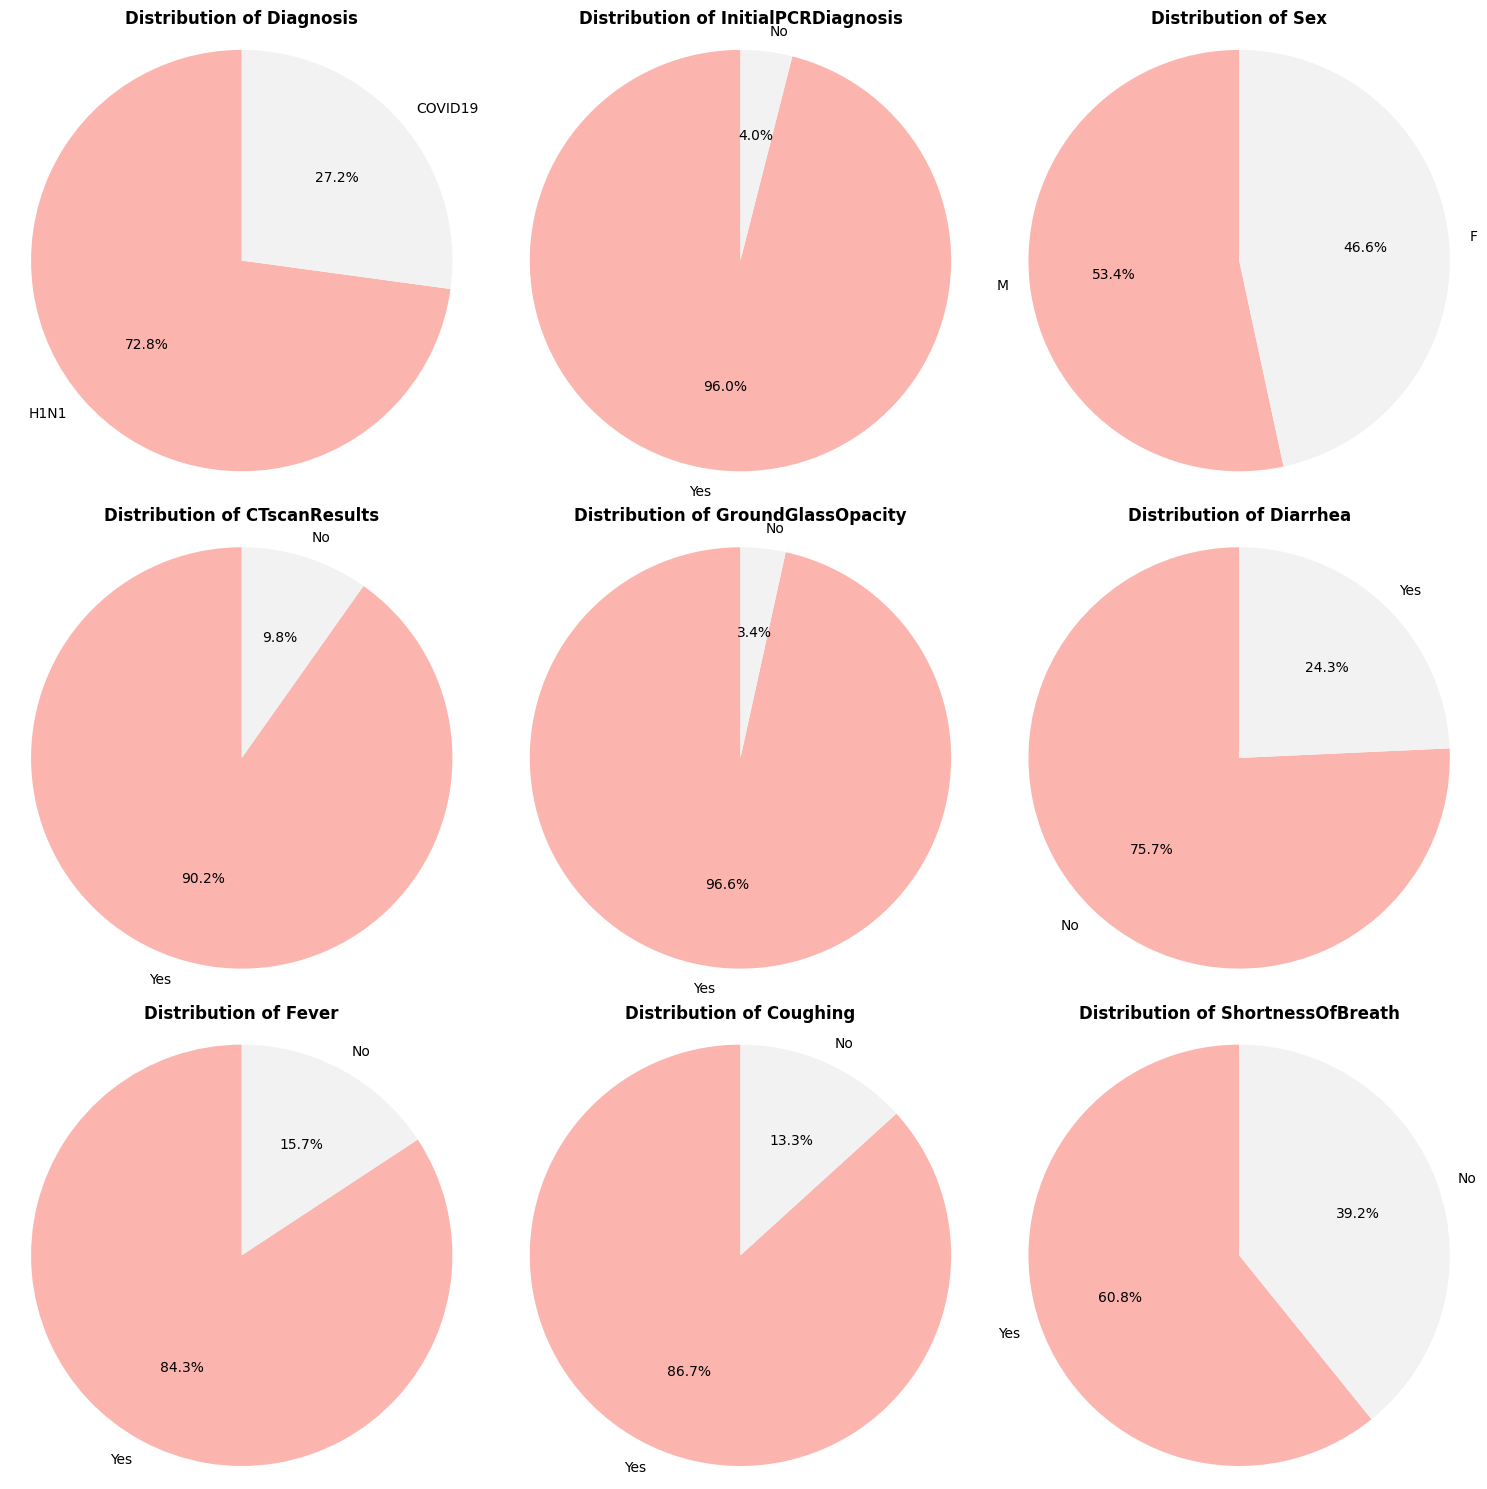

In [141]:
# Get columns with object data type
object_columns = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

plot_count = 0

for column in object_columns:
    if df[column].nunique() > 10 or df[column].count() == 0:
        continue
    
    value_counts = df[column].value_counts().dropna()
    
    if len(value_counts) > 0 and plot_count < 9: 
        ax = axes[plot_count]
        colors = plt.cm.Pastel1(np.linspace(0, 1, len(value_counts)))
        
        ax.pie(value_counts, 
               labels=value_counts.index,
               autopct='%1.1f%%',
               colors=colors,
               shadow=False,
               startangle=90)
        
        ax.set_title(f'Distribution of {column}', 
                    pad=10, 
                    fontsize=12, 
                    fontweight='bold')
        
        ax.axis('equal')
        plot_count += 1
        
        print(f"{column}")
        print(value_counts)
        print()

for i in range(plot_count, 9):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


#### Semua fitur object/categorical, kecuali Diagnosis dan Sex, memiliki nilai Yes dan No. Nilai yang missing di fitur-fitur tersebut yang nilainya kosong, akan diubah menjadi No.

In [142]:
# Replace missing values with 'No' in all categorical columns except Sex and Diagnosis
categorical_cols = df.select_dtypes(include=['object']).columns
cols_to_fill = [col for col in categorical_cols if col not in ['Sex', 'Diagnosis']]
df.loc[:, cols_to_fill] = df[cols_to_fill].fillna('No')

for col in cols_to_fill:
    print(f"{col} values after replacement:")
    print(df[col].value_counts())
    print(f"Missing values in {col} column: {df[col].isna().sum()}")
    print()

InitialPCRDiagnosis values after replacement:
InitialPCRDiagnosis
No     1295
Yes      97
Name: count, dtype: int64
Missing values in InitialPCRDiagnosis column: 0

CReactiveProteinLevels values after replacement:
CReactiveProteinLevels
No      1267
8          3
15         3
0.5        3
0.4        2
        ... 
35.6       1
13         1
33.2       1
85         1
28.4       1
Name: count, Length: 112, dtype: int64
Missing values in CReactiveProteinLevels column: 0

CTscanResults values after replacement:
CTscanResults
No     1254
Yes     138
Name: count, dtype: int64
Missing values in CTscanResults column: 0

RiskFactors values after replacement:
RiskFactors
No                         1187
asthma                       36
immuno                       21
pneumonia                    21
diabetes                     16
                           ... 
diabetes,Hypertension         1
coronary artery disease       1
Hypertension                  1
hyperthyroidism               1
Lung Disease

Diagnosis
Diagnosis
H1N1       1014
COVID19     378
Name: count, dtype: int64

InitialPCRDiagnosis
InitialPCRDiagnosis
No     1295
Yes      97
Name: count, dtype: int64

Sex
Sex
M    743
F    649
Name: count, dtype: int64

CTscanResults
CTscanResults
No     1254
Yes     138
Name: count, dtype: int64

GroundGlassOpacity
GroundGlassOpacity
No     1308
Yes      84
Name: count, dtype: int64

Diarrhea
Diarrhea
No     1283
Yes     109
Name: count, dtype: int64

Fever
Fever
Yes    771
No     621
Name: count, dtype: int64

Coughing
Coughing
Yes    739
No     653
Name: count, dtype: int64

ShortnessOfBreath
ShortnessOfBreath
No     1347
Yes      45
Name: count, dtype: int64



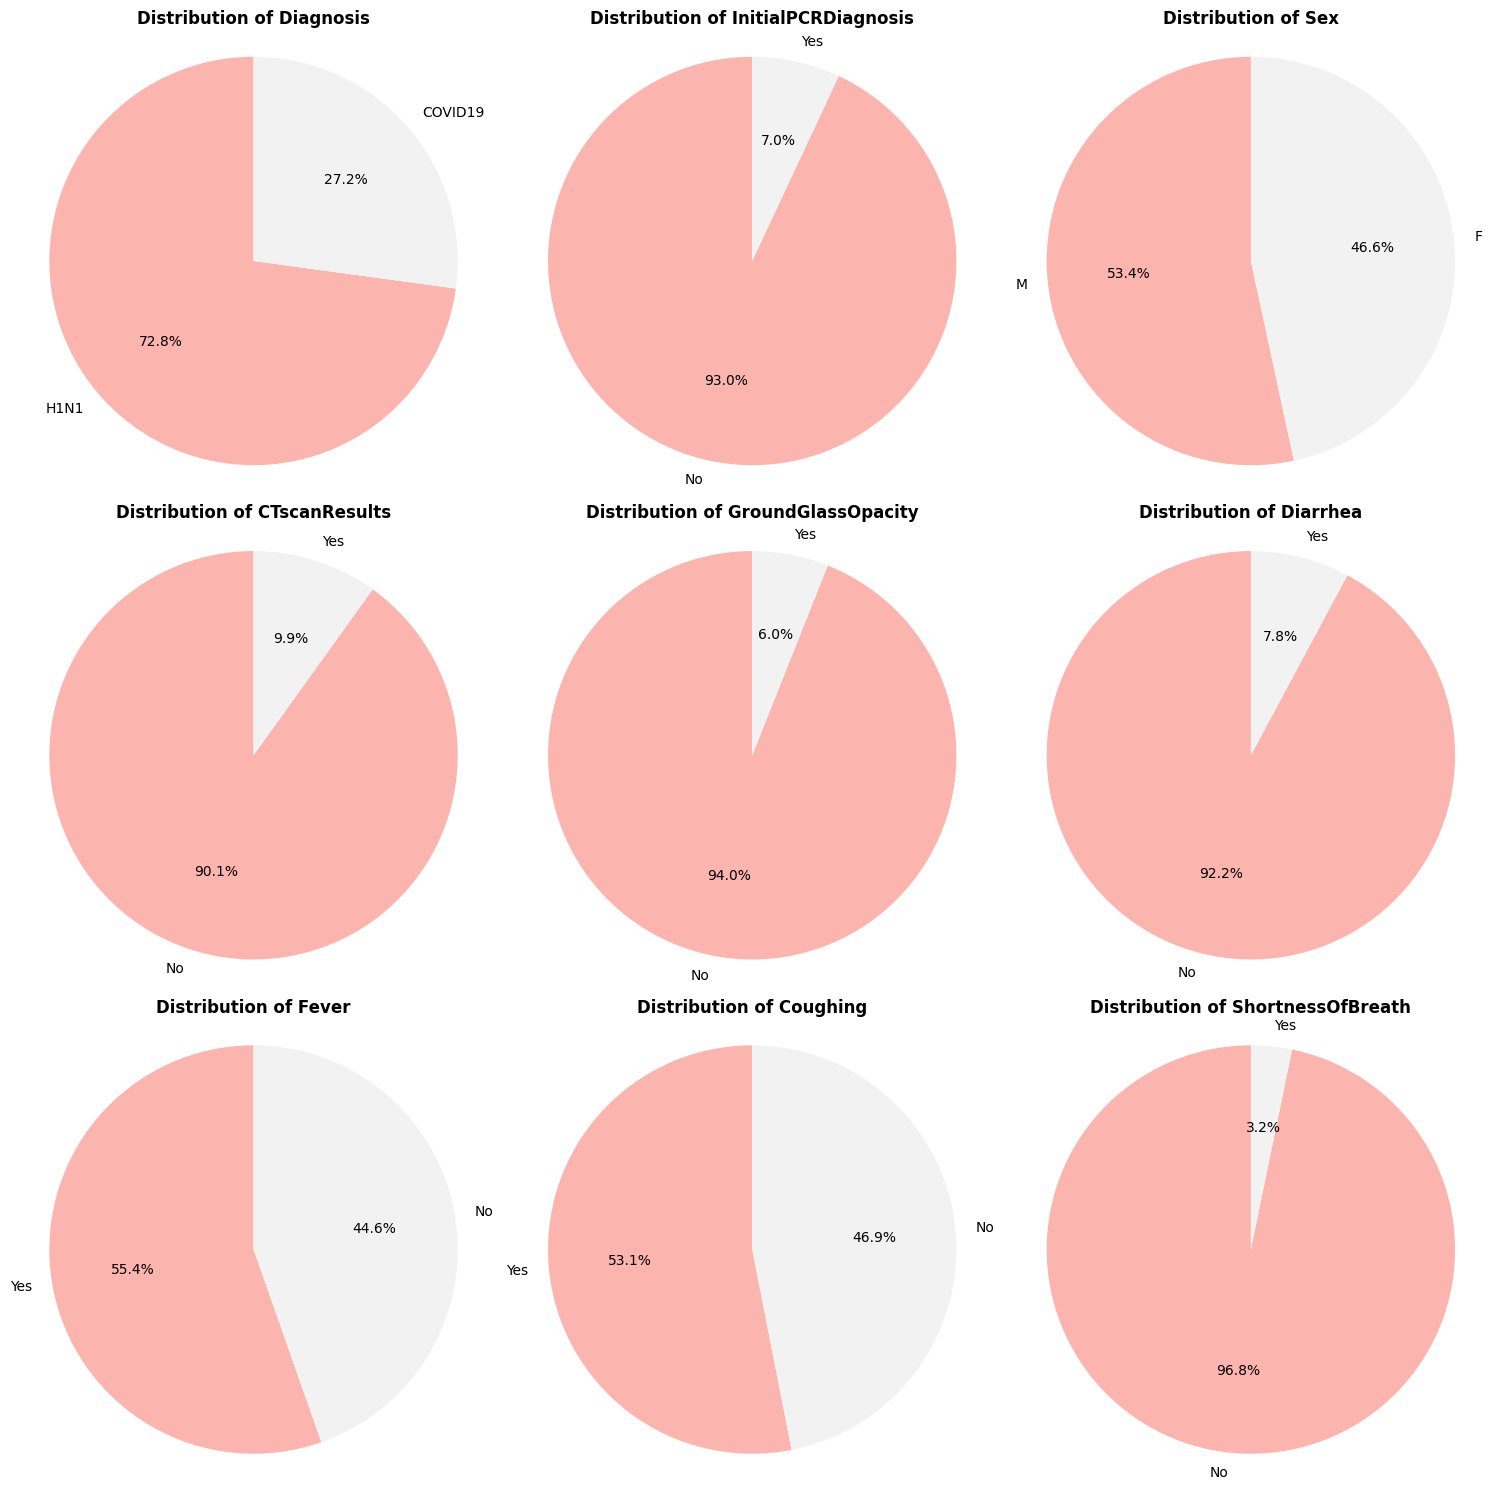

In [143]:
object_columns = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

plot_count = 0

for column in object_columns:
    if df[column].nunique() > 10 or df[column].count() == 0:
        continue
    
    value_counts = df[column].value_counts().dropna()
    
    if len(value_counts) > 0 and plot_count < 9: 
        ax = axes[plot_count]
        colors = plt.cm.Pastel1(np.linspace(0, 1, len(value_counts)))
        
        ax.pie(value_counts, 
               labels=value_counts.index,
               autopct='%1.1f%%',
               colors=colors,
               shadow=False,
               startangle=90)
        
        ax.set_title(f'Distribution of {column}', 
                    pad=10, 
                    fontsize=12, 
                    fontweight='bold')
        
        ax.axis('equal')
        plot_count += 1
        
        print(f"{column}")
        print(value_counts)
        print()

for i in range(plot_count, 9):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


#### Di atas pembagian data categorical setelah nilai yang kosong diubah menjadi No. Setiap fitur sekarang sebagian besar nilainya No.

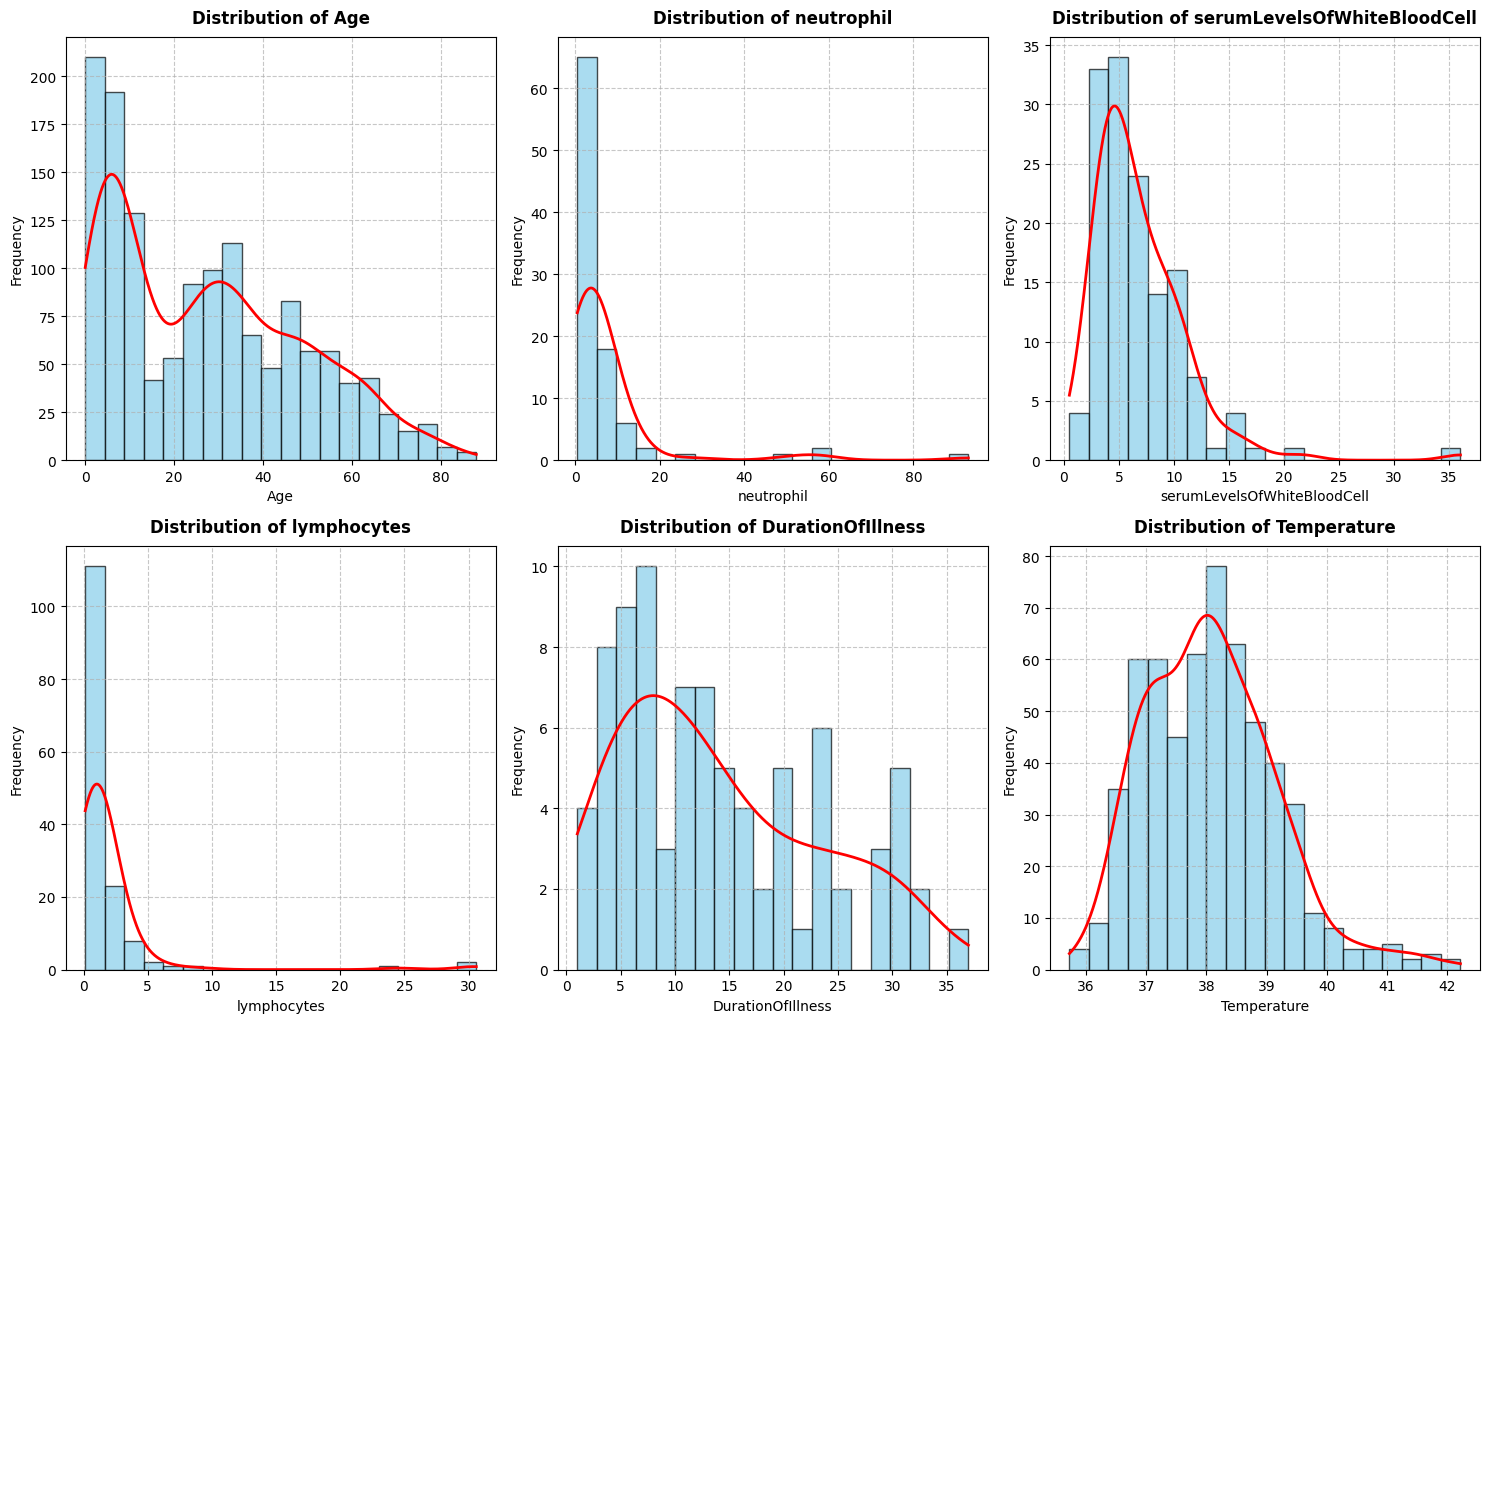

In [144]:
from scipy import stats
import numpy as np

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_numeric_columns = len(numeric_columns)

if num_numeric_columns <= 2:
    fig, axes = plt.subplots(1, num_numeric_columns, figsize=(15, 6))
    if num_numeric_columns == 1:
        axes = [axes]
else:
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()

plot_count = 0

for column in numeric_columns:
    if plot_count < len(axes):
        ax = axes[plot_count]
        
        n, bins, patches = ax.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        
        density = stats.gaussian_kde(df[column].dropna())
        x = np.linspace(df[column].min(), df[column].max(), 1000)
        y = density(x) * len(df[column].dropna()) * (bins[1] - bins[0])
        ax.plot(x, y, 'r-', lw=2)
        
        ax.set_title(f'Distribution of {column}', 
                    pad=10, 
                    fontsize=12, 
                    fontweight='bold')
        
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        
        ax.grid(True, linestyle='--', alpha=0.7)
        
        plot_count += 1

if num_numeric_columns > 2:
    for i in range(plot_count, len(axes)):
        axes[i].axis('off')

plt.tight_layout()
plt.show()


#### Visualisasi distribusi fitur numeric. Sebagian besar distribusi normal ke kiri, namun fitur Age ada 2 puncak di Age kecil dan 30an yang berarti banyak diagnosa dilakukan terhadap sekitar umur 10an dan 30an.

In [145]:
# Replace missing values in the numeric columns with the median
for column in numeric_columns:
    median_value = df[column].median()
    df.loc[:, column] = df[column].fillna(median_value)


#### Fitur numerical yang nilainya missing akan kita isi dengan nilai median. Ini adalah solusi sementara, namun distribusi akan berubah.

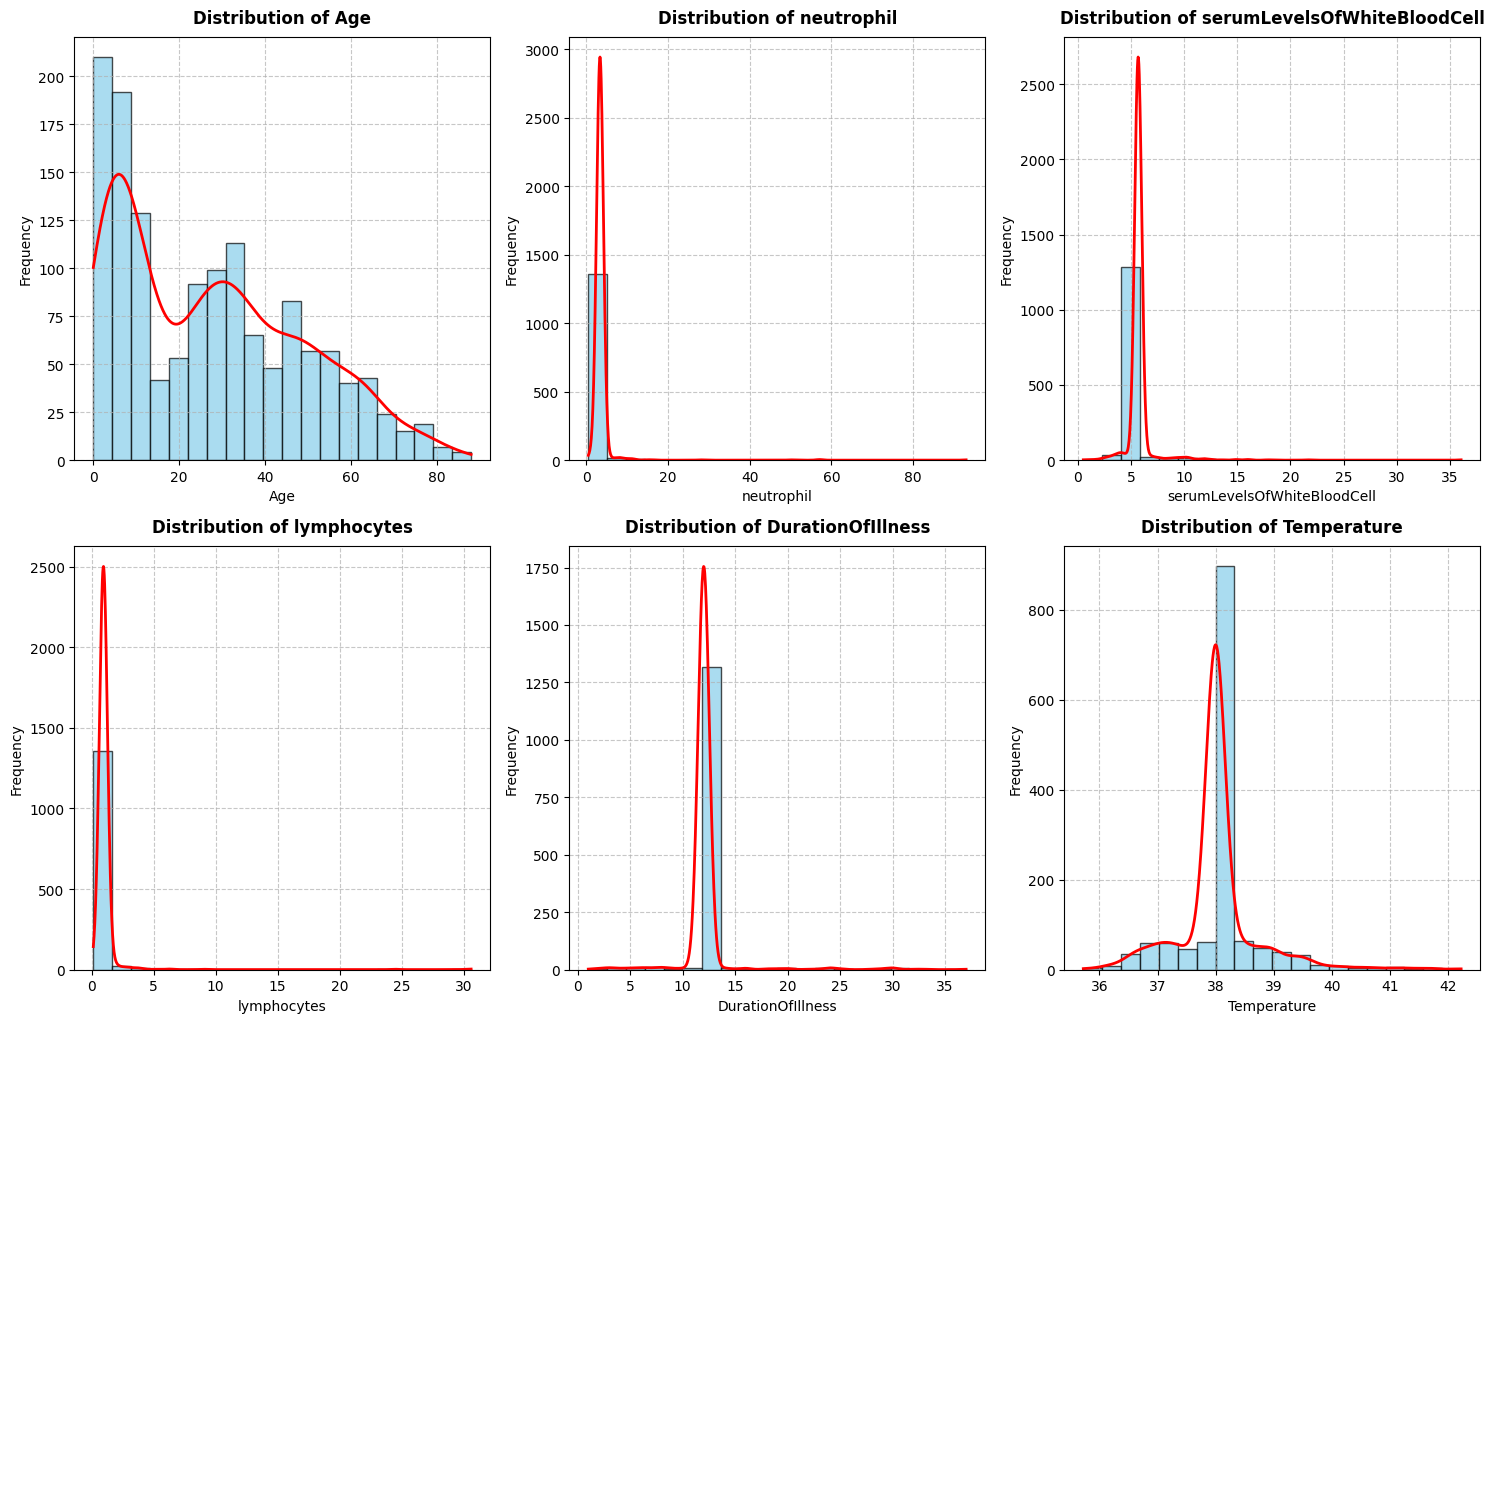

In [146]:
from scipy import stats
import numpy as np

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_numeric_columns = len(numeric_columns)

if num_numeric_columns <= 2:
    fig, axes = plt.subplots(1, num_numeric_columns, figsize=(15, 6))
    if num_numeric_columns == 1:
        axes = [axes]
else:
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()

plot_count = 0

for column in numeric_columns:
    if plot_count < len(axes):
        ax = axes[plot_count]
        
        n, bins, patches = ax.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        
        density = stats.gaussian_kde(df[column].dropna())
        x = np.linspace(df[column].min(), df[column].max(), 1000)
        y = density(x) * len(df[column].dropna()) * (bins[1] - bins[0])
        ax.plot(x, y, 'r-', lw=2)
        
        ax.set_title(f'Distribution of {column}', 
                    pad=10, 
                    fontsize=12, 
                    fontweight='bold')
        
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        
        ax.grid(True, linestyle='--', alpha=0.7)
        
        plot_count += 1

if num_numeric_columns > 2:
    for i in range(plot_count, len(axes)):
        axes[i].axis('off')

plt.tight_layout()
plt.show()


#### Disbribusi mirip, di fitur-fitur puncaknya naik karena yang missing banyak (diatas 50%) diubah dengan nilai median, sedangkan di fitur Age yang missing sedikit, ketika dimasukkan mediannya hanya sedikit berpengaruh.

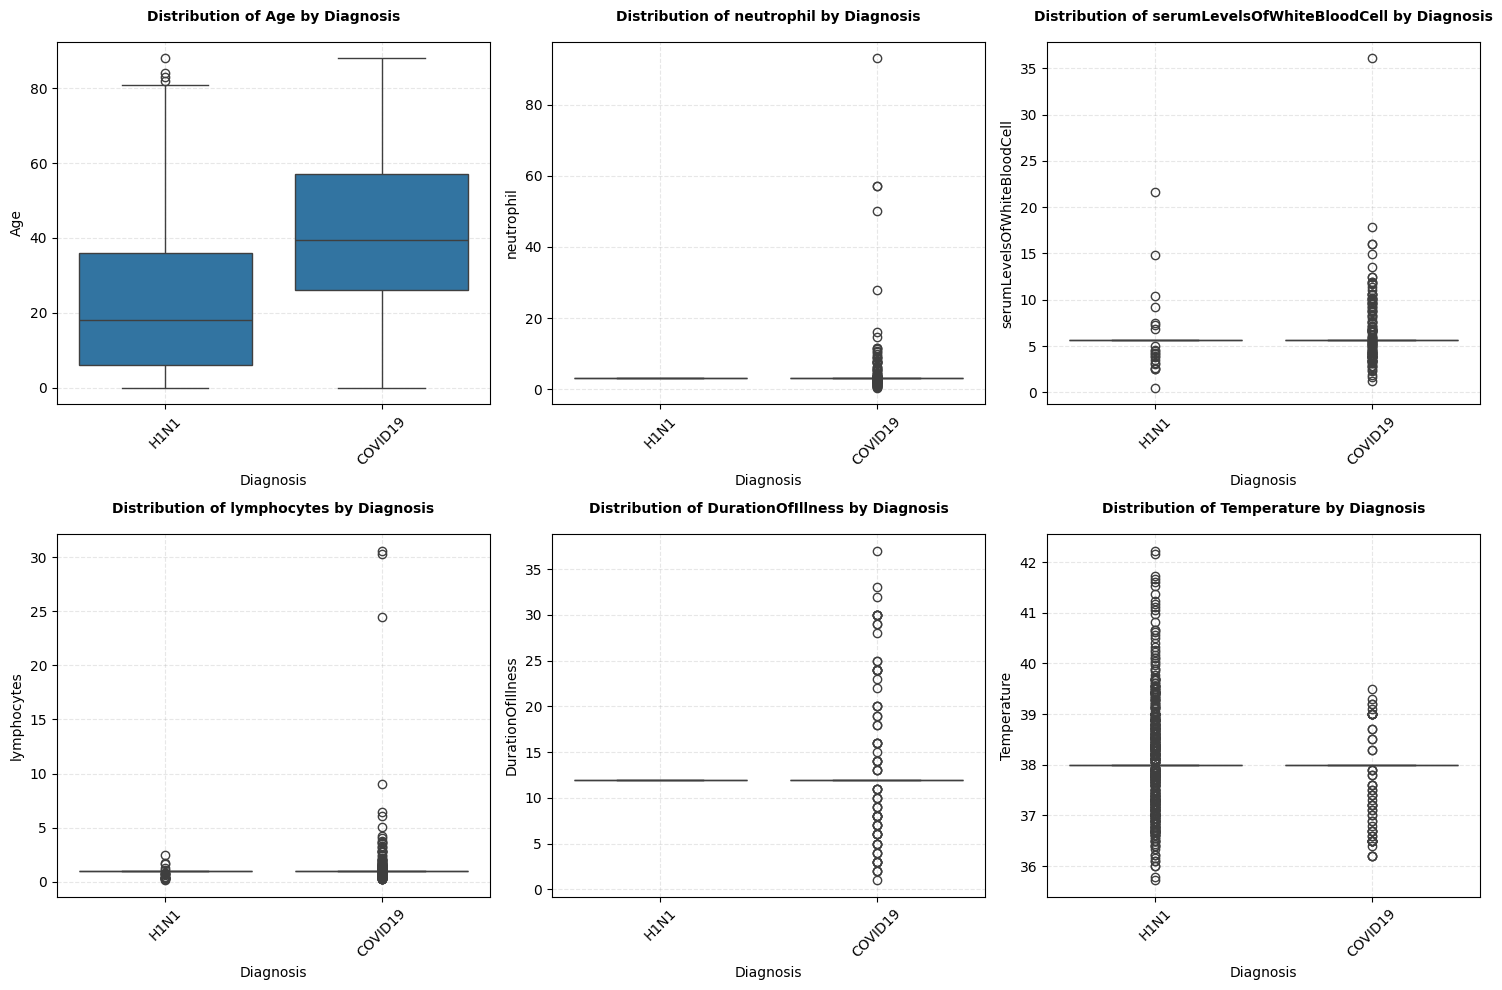

In [147]:
# Create boxplots for each numeric column grouped by Diagnosis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

n_plots = len(numeric_columns)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for idx, column in enumerate(numeric_columns):
    sns.boxplot(x='Diagnosis', y=column, data=df, ax=axes[idx])
    
    axes[idx].set_title(f'Distribution of {column} by Diagnosis',
                       pad=15,
                       fontsize=10,
                       fontweight='bold')
    
    axes[idx].set_xlabel('Diagnosis')
    axes[idx].set_ylabel(column)
    
    axes[idx].grid(True, linestyle='--', alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

for idx in range(len(numeric_columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


In [148]:
# Change Yes/No values to True/False, preserving other values
for column in object_columns:
    if df[column].isin(['Yes', 'No']).any():
        df.loc[:, column] = df[column].map({'Yes': True, 'No': False})

#### Disini kita ubah nilai Yes dan No di setiap fitur categorical menjadi Boolean, untuk meningkatkan kecepatan program saja.

In [149]:
df['Diagnosis']

0          H1N1
1          H1N1
2          H1N1
3          H1N1
4          H1N1
         ...   
1472    COVID19
1473    COVID19
1474    COVID19
1475    COVID19
1476    COVID19
Name: Diagnosis, Length: 1392, dtype: object

#### Setelah data bersih, kita dapat lanjut ke training model.

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [151]:
df_encoded = pd.get_dummies(df, columns=['Sex'])

X = df_encoded.drop('Diagnosis', axis=1)
y = df_encoded['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [152]:
df


,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,False,67.0,F,3.32,5.67,0.95,False,12.0,False,False,False,False,True,True,False,False,False,38.111111,False
1,H1N1,False,29.0,M,3.32,5.67,0.95,False,12.0,False,False,False,False,False,False,False,False,False,38.000000,False
2,H1N1,False,22.0,F,3.32,5.67,0.95,False,12.0,False,False,False,False,False,False,False,False,False,38.000000,False
3,H1N1,False,20.0,F,3.32,5.67,0.95,False,12.0,False,NaN,False,False,True,True,False,False,False,36.555556,True
4,H1N1,False,21.0,M,3.32,5.67,0.95,False,12.0,False,False,False,False,False,False,False,False,False,38.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,COVID19,False,35.0,M,2.62,4.62,1.59,NaN,12.0,False,False,False,False,True,True,False,False,False,38.000000,False
1473,COVID19,False,51.0,M,3.18,4.94,1.45,NaN,12.0,False,False,False,False,False,True,False,False,True,38.000000,False
1474,COVID19,False,65.0,F,5.35,5.89,0.42,NaN,12.0,False,NaN,False,False,True,True,False,False,False,38.000000,False
1475,COVID19,False,72.0,M,3.73,4.99,0.95,NaN,12.0,False,NaN,False,False,True,True,False,False,False,38.000000,False


Accuracy: 0.903
Precision: 0.902
Recall: 0.903
F1 Score: 0.901


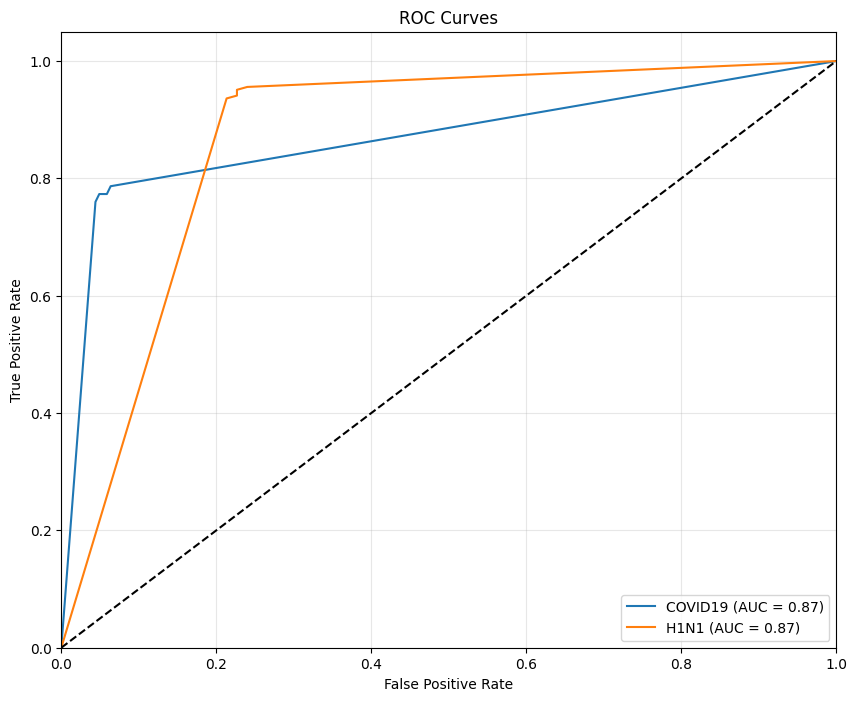

In [153]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import numpy as np

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted') 
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')

plt.figure(figsize=(10, 8))

classes = clf.classes_
for i, class_name in enumerate(classes):
    y_test_class = (y_test == class_name).astype(int)
    y_pred_proba = clf.predict_proba(X_test)[:, i]
    
    fpr, tpr, _ = roc_curve(y_test_class, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


### Hasil
#### Metrik evaluasi menandakan model sudah cukup baik dalam klasifikasi. Model dapat mengklasifikasi 2 kelas dengan F1 score yang lumayan (0.841 ketika drop fitur, 0.901 ketika tidak drop fitur).

## Decision Tree Classifier
 
 Decision tree classifier membuat model berbentuk pohon keputusan untuk klasifikasi berdasarkan fitur-fitur yang ada. Algoritma ini membagi data ke dalam subset berdasarkan ambang batas fitur yang memaksimalkan information gain atau meminimalkan impurity (seperti Gini impurity atau entropy) dalam setiap subset.
 
 Pada setiap node, kriteria pemisahan menggunakan Gini impurity:
 
 $Gini = 1 - \sum_{i=1}^{c} (p_i)^2$
 
 di mana $p_i$ adalah proporsi kelas i dalam node tersebut dan c adalah jumlah kelas.
 
 Prediksi akhir untuk leaf node adalah kelas mayoritas dari data pelatihan dalam node tersebut:
 
 $\hat{y} = \text{mode}(\{y_i : i \in \text{leaf}\})$


## Accuracy
Proporsi prediksi yang benar dari total prediksi:

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

di mana:
- TP (True Positive): kasus positif yang diprediksi benar sebagai positif
- TN (True Negative): kasus negatif yang diprediksi benar sebagai negatif  
- FP (False Positive): kasus negatif yang salah diprediksi sebagai positif
- FN (False Negative): kasus positif yang salah diprediksi sebagai negatif

## Precision
Proporsi prediksi positif yang benar:

$Precision = \frac{TP}{TP + FP}$

## Recall
Proporsi kasus positif aktual yang diprediksi benar:

$Recall = \frac{TP}{TP + FN}$

## F1 Score
Rata-rata harmonik dari precision dan recall:

$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

## ROC (Receiver Operating Characteristic) Curve
Kurva yang menunjukkan trade-off antara True Positive Rate (TPR/Recall) dan False Positive Rate (FPR):

$TPR = \frac{TP}{TP + FN}$

$FPR = \frac{FP}{FP + TN}$

## AUC-ROC Score
Area Under the ROC Curve - mengukur kemampuan model untuk membedakan kelas. Nilai 1.0 berarti klasifikasi sempurna, 0.5 berarti klasifikasi acak.
